In [70]:
# Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../DATA/train_data.csv')
data.head()

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
0,69.6,189,67.2,3.01,67.1
1,69.8,189,67.2,3.01,67.0
2,69.7,189,67.9,3.08,65.9
3,69.7,189,67.8,3.08,65.9
4,69.7,189,67.8,3.08,65.9


### 규제하지 않은 데이터

In [71]:
# 다중공선성 테스트
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_for_vif = data.drop(['scale_pv'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_for_vif.values, i) for i in range(data_for_vif.shape[1])]
vif["features"] = data_for_vif.columns
vif

,VIF Factor,features
0,5191.463485,c_temp_pv
1,628.194449,k_rpm_pv
2,7325.967704,n_temp_pv
3,5334.673950,s_temp_pv


In [72]:
# 다중공선성이 높은 변수 제거
data_for_vif.drop('n_temp_pv', axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_for_vif.values, i) for i in range(data_for_vif.shape[1])]
vif["features"] = data_for_vif.columns
vif

,VIF Factor,features
0,3775.543341,c_temp_pv
1,616.216326,k_rpm_pv
2,2690.773622,s_temp_pv


In [73]:
# 다중공선성이 높은 변수 제거
data_for_vif.drop('c_temp_pv', axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_for_vif.values, i) for i in range(data_for_vif.shape[1])]
vif["features"] = data_for_vif.columns
vif

,VIF Factor,features
0,424.534497,k_rpm_pv
1,424.534497,s_temp_pv


### data의 상관관계 분석
- 결론 : scale과는 상관관계가 거의 없고, 나머지 피처간 상관관계가 높아 다중공선성을 의심해봄
- 해결방안 : PCA를 통해 다중공선성을 해결해보자

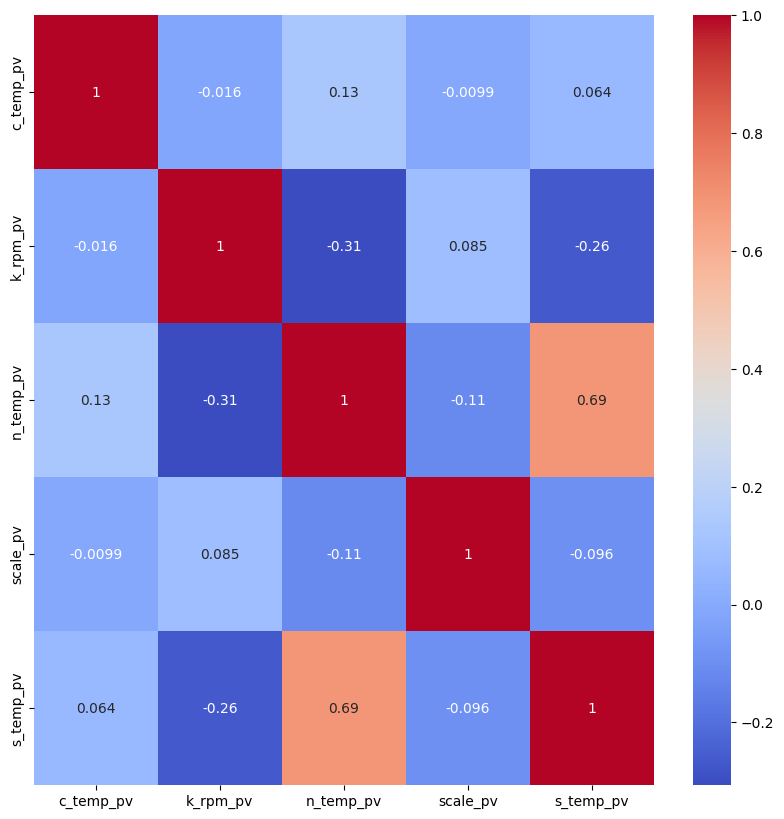

In [74]:
# data corr heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [75]:
# 사실 2~4 규제하지 않으면 상관 관계를 규정할 수 없음

### PCA(Principal Component Analysis) : 주성분 분석
- 다중공선성을 해결하기 위해 PCA를 사용
- 여러 컬럼을 적은 수의 컬럼으로 압축
- PCA를 통해 압축된 데이터를 이용해 모델링

In [76]:
# PCA(주성분 분석)를 통한 차원 축소
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['scale_pv'], axis=1))

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
# reset index
data_pca.index = data.index
data_pca['scale_pv'] = data['scale_pv']
data_pca.head()

,PC1,PC2,scale_pv
0,-1.354785,0.926646,3.01
1,-1.348325,0.548493,3.01
2,-1.512235,0.672374,3.08
3,-1.571052,0.673400,3.08
4,-1.571052,0.673400,3.08


In [77]:
# data_pca vif
data_pca_for_vif = data_pca.drop(['scale_pv'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_pca_for_vif.values, i) for i in range(data_pca_for_vif.shape[1])]
vif["features"] = data_pca_for_vif.columns
vif

,VIF Factor,features
0,1.0,PC1
1,1.0,PC2


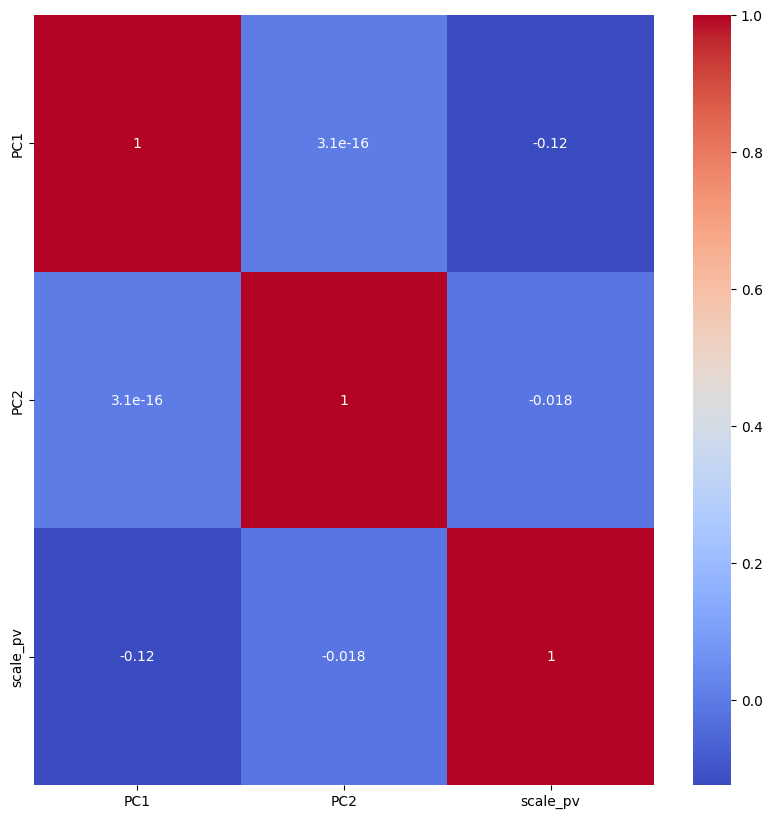

In [78]:
# corr heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data_pca.corr(), annot=True, cmap='coolwarm')
plt.show()

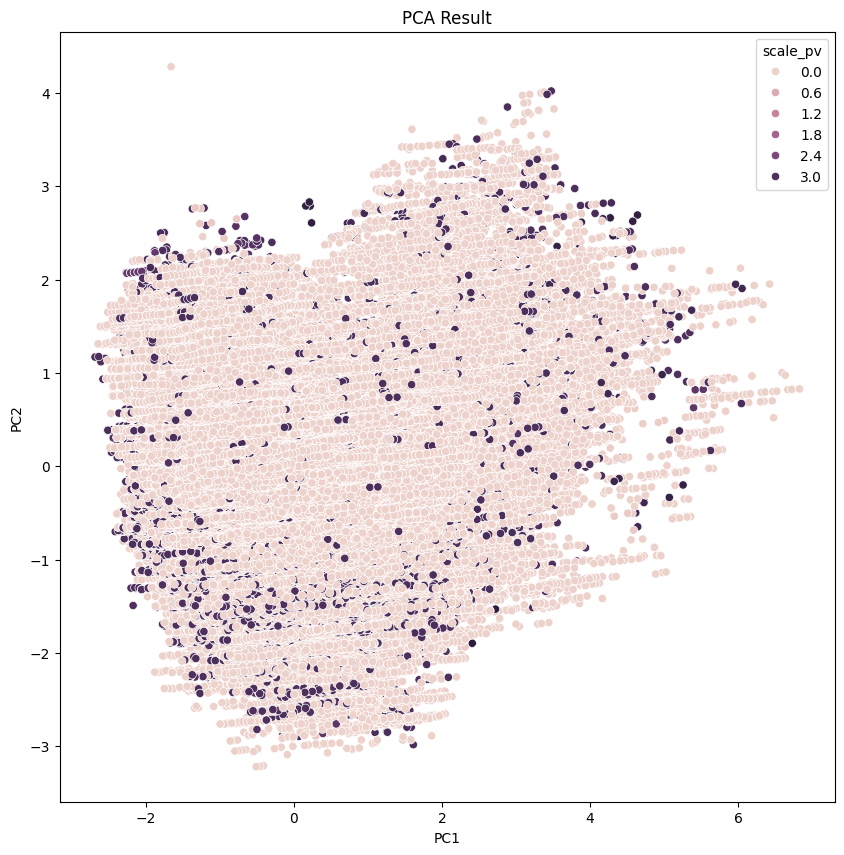

In [79]:
# PCA 결과 시각화
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_pca, x='PC1', y='PC2', hue='scale_pv')
plt.title('PCA Result')
plt.show()

### 규제한 데이터

In [80]:
# data load
data = pd.read_csv('../DATA/train_data.csv')

# scale : 2 ~ 4
data_2_4 = data[(data['scale_pv'] >= 2) & (data['scale_pv'] <= 4)]

# PCA
scaler = StandardScaler()
data_2_4_scaled = scaler.fit_transform(data_2_4.drop(['scale_pv'], axis=1))

pca = PCA(n_components=2)
data_2_4_pca = pca.fit_transform(data_2_4_scaled)

data_2_4_pca = pd.DataFrame(data_2_4_pca, columns=['PC1', 'PC2'])
# reset index
data_2_4_pca.index = data_2_4.index
data_2_4_pca['scale_pv'] = data_2_4['scale_pv']
data_2_4_pca.head()

,PC1,PC2,scale_pv
0,-1.241010,0.363331,3.01
1,-1.162645,0.042563,3.01
2,-1.316360,0.085097,3.08
3,-1.388302,0.087082,3.08
4,-1.388302,0.087082,3.08


In [81]:
data_2_4.shape, data_2_4_pca.shape

((36721, 5), (36721, 3))

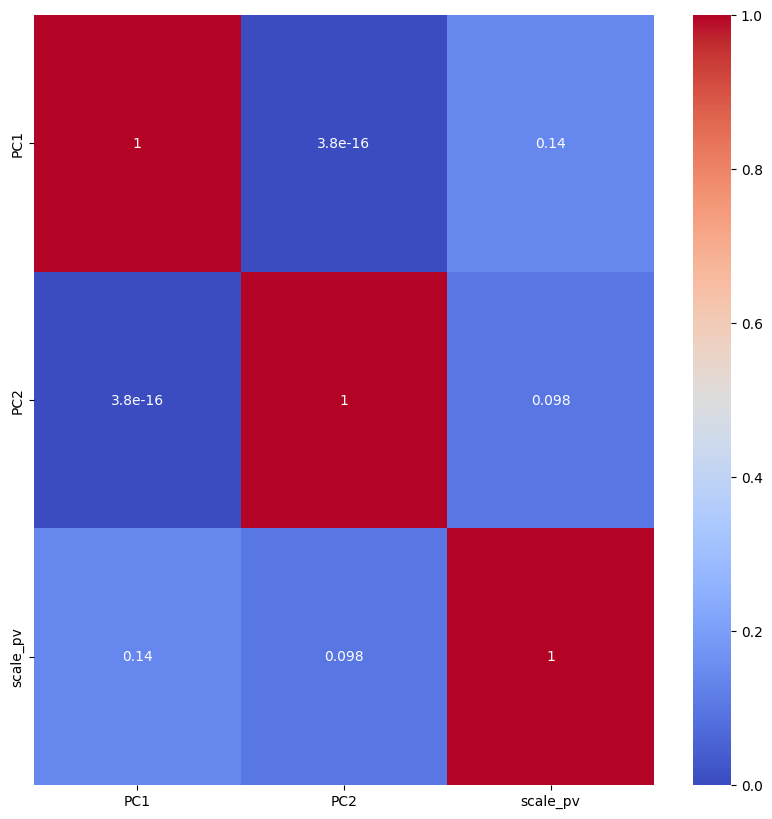

In [82]:
# corr heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data_2_4_pca.corr(), annot=True, cmap='coolwarm')
plt.show()

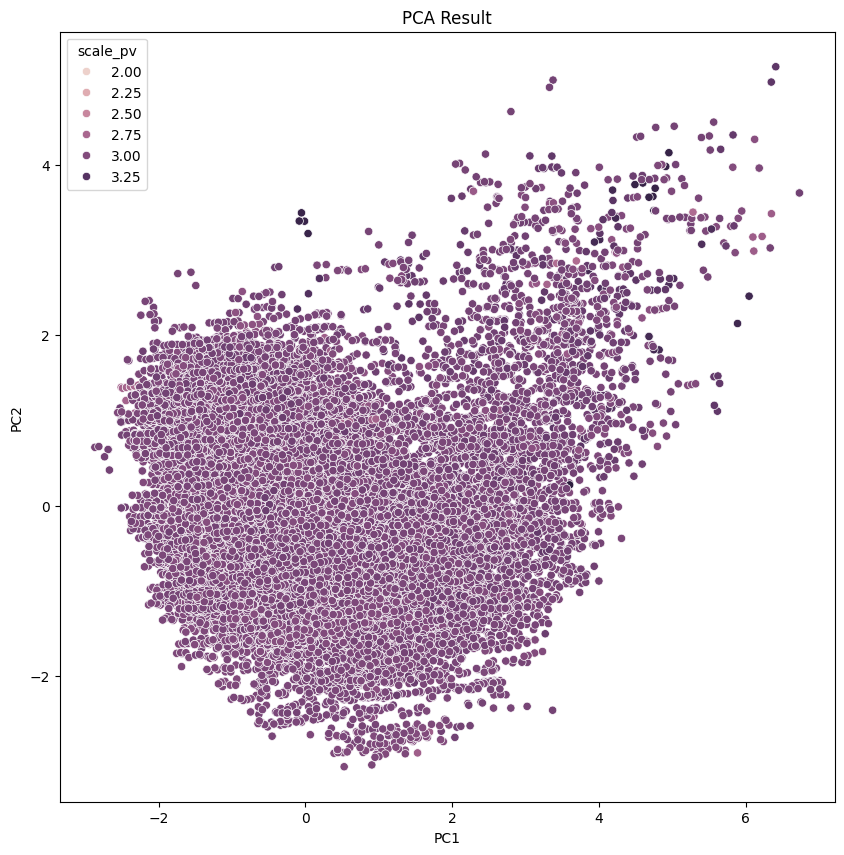

In [83]:
# PCA 결과 시각화
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_2_4_pca, x='PC1', y='PC2', hue='scale_pv')
plt.title('PCA Result')
plt.show()

In [84]:
# viff of data_2_4
data_2_4_for_vif = data_2_4.drop(['scale_pv'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_2_4_for_vif.values, i) for i in range(data_2_4_for_vif.shape[1])]
vif["features"] = data_2_4_for_vif.columns
vif

,VIF Factor,features
0,7113.401348,c_temp_pv
1,614.959738,k_rpm_pv
2,8906.037094,n_temp_pv
3,5338.386844,s_temp_pv


In [85]:
# data_2_4_pca 의 vif
data_2_4_pca_for_vif = data_2_4_pca.drop(['scale_pv'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_2_4_pca_for_vif.values, i) for i in range(data_2_4_pca_for_vif.shape[1])]
vif["features"] = data_2_4_pca_for_vif.columns
vif

,VIF Factor,features
0,1.0,PC1
1,1.0,PC2


### PCA + 규제 모델 학습

In [86]:
data_2_4_pca

,PC1,PC2,scale_pv
0,-1.241010,0.363331,3.01
1,-1.162645,0.042563,3.01
2,-1.316360,0.085097,3.08
3,-1.388302,0.087082,3.08
4,-1.388302,0.087082,3.08
...,...,...,...
200095,-1.897498,0.679605,3.06
200096,-1.963556,0.835469,3.06
200105,-1.867080,1.006053,3.06
200106,-1.920831,0.997013,3.06


In [87]:
# 결측값 문제; data_2_4_pca
data_2_4_pca.isnull().sum() # 해결! 

PC1         0
PC2         0
scale_pv    0
dtype: int64

In [88]:
# 모델 학습 및 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X = data_2_4_pca.drop(['scale_pv'], axis=1)
y = data_2_4_pca['scale_pv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MAE: {mae:.4f}, MAPE: {mape*100:.4f}, R2: {r2:.4f}')


Linear Regression - MAE: 0.0264, MAPE: 0.8740, R2: 0.0320
Random Forest - MAE: 0.0264, MAPE: 0.8736, R2: 0.0778


In [89]:
# 성능이 나쁘진 않지만 KNN 보다 극명히 좋진 않다

# data_2_4의 scale_pv describe
data_2_4['scale_pv'].describe()

count    36721.000000
mean         3.041585
std          0.039304
min          2.000000
25%          3.020000
50%          3.040000
75%          3.060000
max          3.490000
Name: scale_pv, dtype: float64